# Lab #1. Numpy, Pandas and Matplotlib

### Important: do not delete any blocks
#### But you may add as many as you need.

This aim of this lab is to get you aquainted to very important python modules (libraries):
- numpy
- pandas
- matplotlib

Make sure to install these modules before you start.

#### About tasks

This notebook consists of numerous tasks but please make it look like a whole story: a report with your own code, thoughts and conclusions. In some of these tasks you will have to implement some custom functions, in some of them you will be asked to present some plots and describe them. Please try to make your code as short as possible and your answers as clear as possible.



#### Evaluation

- Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url. 
- There are **Questions** in the tasks, don't skip them. If you skip a question, value of the task becomes 0. 
- When your answer includes some numbers, make sure to provide some code or calculations that prove your results.
- Pay a lot attention to your plots:
    - Are they comprehensible? Shapes, colours, sizes?
    - Are they titled?
    - Are axes labelled?
    - Is legend included?

#### How to submit
- Name your file according to this convention: `2022_lab01_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab01_404_Sheipak_Sviat.ipynb`
    - `2022_lab01_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab01_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is `2022-10-06 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/FnMXcdDjbWTxTw

## Part 1. Numpy and plots [2.5 points]

`numpy` is a module that helps you to deal with vectors (matrices and tensors too) and it has a lot of cool features.

Firstly, let's import it:

In [117]:
import numpy as np

Vectors in numpy are called **arrays**. Create an array from a list:

In [118]:
my_list = [1, 2, 3, 4, 5, 6]
my_vector = np.array(my_list)
print(my_list)
print(my_vector)

[1, 2, 3, 4, 5, 6]
[1 2 3 4 5 6]


You can reshape them:

In [119]:
my_vector = my_vector.reshape((2, 3))
print(my_vector.shape)
print(my_vector)

my_vector = my_vector.reshape((6, 1))
print(my_vector.shape)
print(my_vector)

(2, 3)
[[1 2 3]
 [4 5 6]]
(6, 1)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


You don't even have to state all of dimensions explicitly, since they can be derived (use -1):

In [120]:
my_vector = my_vector.reshape((3, -1))
print(my_vector.shape)
print(my_vector)

(3, 2)
[[1 2]
 [3 4]
 [5 6]]


Slices!

In [121]:
print(my_vector[0, 1])
print(my_vector[:, 1])
print(my_vector[:2])
print(my_vector[:2,::-1])

2
[2 4 6]
[[1 2]
 [3 4]]
[[2 1]
 [4 3]]


Arithmetic operations:

In [122]:
vector_a = np.arange(10)
print(vector_a)
print(vector_a - 10)
print(vector_a * 100)
print(np.array([5, 4]) + np.array([1, 6]))
print(np.array([5, 4]) * np.array([1, 6]))

[0 1 2 3 4 5 6 7 8 9]
[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1]
[  0 100 200 300 400 500 600 700 800 900]
[ 6 10]
[ 5 24]


**Task 1. Basic arrays [0.5 point]** 

Create a 2-dimensional numpy array `x` of 100 by 2 shape filled with random numbers from $U[0, 1]$

In [123]:
x = np.random.uniform(0, 1, 200).reshape(100, 2)

assert x.shape == (100, 2), "Wrong shape"
assert x.min() >= 0 and x.max() <= 1, "Wrong range"
assert np.abs(x.mean() - 0.5) < 8e-2, "Wrong distribution or bad luck"
x.mean()

0.4924999345803424

Calculate averages: row-wise, column-wise and total. Use `np.mean` and `axis` parameter. Then `print` the `mean_total` rounded to 3 digits after comma (using `format` method).

In [124]:
mean_by_row = np.mean(x, axis=1)
mean_by_col = np.mean(x, axis=0)
mean_total = np.mean(x)

assert mean_by_row.shape == (100, )
assert mean_by_col.shape == (2, )
assert mean_total.shape == ()

print("The total mean is {0:.3f}".format(mean_total))


The total mean is 0.492


**Task 2. Sort 2-dim array [0.5 point]** 

Create a 1-dimensional numpy array `y` of 100 random **integers** from $U\{0, 1, 2, 3\}$

In [125]:
y = np.random.choice(4, 100)

assert y.shape == (100,)

Import class `Counter` from `collections` module.

In [126]:
from collections import Counter

In [127]:
from itertools import count


basic_counter = Counter(y)
container_A = dict(basic_counter)
container_B = list(basic_counter.items())
container_C = np.array(container_B)

In [128]:
print(container_A, container_B, container_C)

{2: 22, 3: 35, 0: 25, 1: 18} [(2, 22), (3, 35), (0, 25), (1, 18)] [[ 2 22]
 [ 3 35]
 [ 0 25]
 [ 1 18]]


Here are three data structures.

**Question:** What is the type of `container_A`? What is the type of `container_B`? What is the type of the elements of `container_C`?

**Your answer:** container_A is the dictionary; container_B is the list; the elements of container_C is the arrays/vectors

Use `np.sort` to order elements of `container_C` acsending by their first coordinate (pay attention to `axis` parameter).

In [129]:
counter_values = container_C[container_C[:, 0].argsort()]

assert list(counter_values[:, 0]) == [0, 1, 2, 3], "Error: Wrong order"
assert min([container_A[x[0]] == x[1] for x in counter_values]), "Error: Count values shuffled"
print("Great!")

Great!


**Task 3. Basic barplot [0.5 points]** 

Plot a barplot representing how many times each value `0, 1, 2, 3` is encounterd in `y`. Do not forget to:
- Add title to the plot
- Label the axes
- Specify x-ticks 

You may use `counter_values` you have obtained in a Task 2.

In [130]:
import matplotlib.pyplot as plt

In [131]:
print(counter_values)

[[ 0 25]
 [ 1 18]
 [ 2 22]
 [ 3 35]]


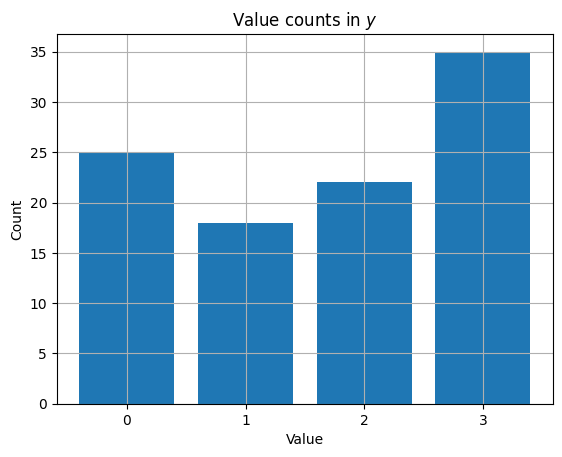

In [132]:
plt.title("Value counts in $y$")
plt.bar(counter_values[:, 0], counter_values[:, 1])
plt.xticks(counter_values[:, 0])
plt.xlabel("Value")
plt.ylabel("Count")
plt.grid(10)
plt.show()

**Task 4. Concat two numpy arrays [0.5 point]**

You have:
- `x`: 100 $\times$ 2
- `y`: 100

Concatenate them horizontally to get `z`: 100 $\times$ 3

In [133]:
z = np.array([x[:, 0], x[:, 1], y]).T

assert z.shape == (100, 3) and np.equal(z[:, :2], x).all() and np.equal(z[:, -1], y).all()

**Task 5. Basic Scatter Plot [0.5 point]**

You have:
- `z`: 100 $\times$ 3

Each row of `z` consists of 3 numbers. Build a scatter plot where each row is represented by a dot: first and second number are coordinates and third number corresponds to dot colour. Don't forget to add a legend.

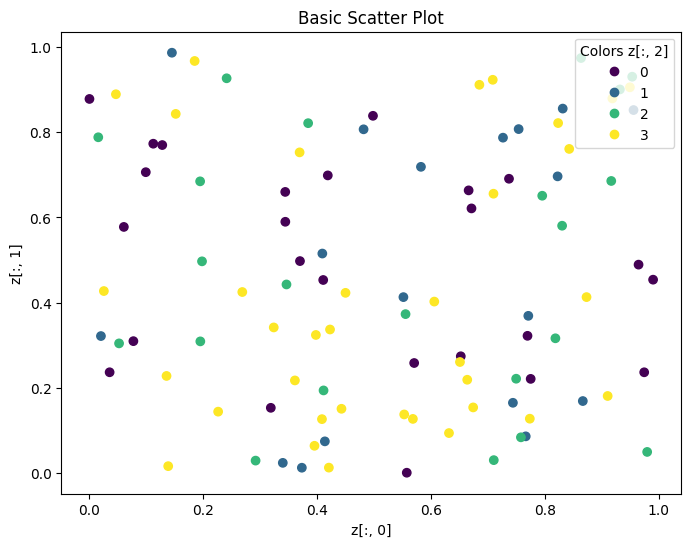

In [134]:
from cProfile import label


plt.figure(figsize=(8, 6))
plt.title("Basic Scatter Plot")
scatter = plt.scatter(z[:, 0], z[:, 1], c=z[:, 2].astype(int))
plt.legend(*scatter.legend_elements(prop="colors"), loc="upper right", title="Colors z[:, 2]")
plt.xlabel("z[:, 0]")
plt.ylabel("z[:, 1]")
plt.show()

# Part 2. Moscow houses [4.5 points]

In this part we start to work with datasets and `pandas` module.
You will need to download `moscow_coords.csv` file. It provides a coordinate and an address for some houses in Moscow. The original source of the data: https://data.mos.ru/opendata/60562/data/table?versionNumber=3&releaseNumber=445

In [135]:
import pandas as pd

In [136]:
coords_db = pd.read_csv("data/moscow_coords.csv")

In [137]:
coords_db.head(10)

,ADDRESS,coor_x,coor_y
0,"город Москва, Варшавское шоссе, дом 150, строе...",37.601252,55.599249
1,"город Москва, Косинская улица, дом 26А",37.828115,55.717493
2,"город Москва, Гороховский переулок, дом 21",37.668093,55.766224
3,"город Москва, Тагильская улица, дом 4, строени...",37.752887,55.818257
4,"город Москва, Ленинградский проспект, дом 73А,...",37.513546,55.803510
5,"город Москва, улица Вострухина, дом 5А",37.797659,55.720022
6,"город Москва, улица Космонавта Волкова, дом 10...",37.514713,55.815373
7,"город Москва, Балтийская улица, дом 8, строени...",37.517288,55.809580
8,"город Москва, улица Головачёва, дом 3, корпус 2",37.805437,55.675219
9,"город Москва, Климентовский переулок, дом 1, с...",37.631972,55.740967


In [138]:
print(type(coords_db))
print(coords_db.shape)
print(coords_db.columns)
print(type(coords_db["ADDRESS"]))

<class 'pandas.core.frame.DataFrame'>
(406934, 3)
Index(['ADDRESS', 'coor_x', 'coor_y'], dtype='object')
<class 'pandas.core.series.Series'>


**Task 1. Address analysis [0.5 point]**

As we can see, the dataset has 3 columns: `ADDRESS`, `coor_x` and `coor_y`.
Let's focus on `ADDRESS` - the datatype of this column is `str`.

Your task is to find and describe addresses that inlcude word `город`* at least two times.

**город* - *city* in russian

Let's do it step by step:
1. Implement a function `tokenize_address`, that takes a string

* casts string to lowercase;
    
* removes all `,` and `.` symbols;
    
* splits string into a `list` of strings; separation symbol is a whitespace ` `.
    
2. Implement a function `count_a_token`, that takes a list of strings and counts number of entries of a particular token.

In [139]:
def tokenize_address(input_string):
    """
    input:
    - input_string: str
    output:
    - list<str> - string split into tokens
    """
    output_string =  input_string.lower()
    output_string = output_string.replace(',', '')
    output_string = output_string.replace('.', '')

    return output_string.split()

assert tokenize_address("A, b. C, and d?") == ["a", "b", "c", "and", "d?"], "Something is wrong"

In [140]:
def count_a_token(token_list, lookup_token):
    """
    input:
    - token_list: list<str>
    - lookup_token: str
    output:
    - int - how many times lookup_token is encountered in token_list
    """
    count = 0
    for str in token_list:
        if str == lookup_token:
            count += 1
    return count        

In [141]:
test_address = "город Москва, улица Космонавта Волкова, дом 10."
tokens = tokenize_address(test_address)
print(tokens)
print(count_a_token(tokens, "город"))

assert tokens == ["город", "москва", "улица", "космонавта", "волкова", "дом", "10"]
assert count_a_token(tokens, "город") == 1
print("Seems fine!")

['город', 'москва', 'улица', 'космонавта', 'волкова', 'дом', '10']
1
Seems fine!


Now it is time add new column `city_token_cnt` to the dataset. Values in this column should be a result of applying two functions above to a `coords_db["ADDRESS"]`. Note that `coords_db["ADDRESS"]` is a `pandas.Series` object and it has method `apply`.

In [142]:
coords_db.loc[:, "city_token_cnt"] = coords_db["ADDRESS"].apply(lambda x: count_a_token(tokenize_address(x), "город"))

In [143]:
coords_db.head()

,ADDRESS,coor_x,coor_y,city_token_cnt
0,"город Москва, Варшавское шоссе, дом 150, строе...",37.601252,55.599249,1
1,"город Москва, Косинская улица, дом 26А",37.828115,55.717493,1
2,"город Москва, Гороховский переулок, дом 21",37.668093,55.766224,1
3,"город Москва, Тагильская улица, дом 4, строени...",37.752887,55.818257,1
4,"город Москва, Ленинградский проспект, дом 73А,...",37.513546,55.803510,1


And the final step: let's do a `groupby` by column `city_token_cnt` to find out how many addresses have token `город` two times or more.

In [144]:
stats = coords_db.groupby('city_token_cnt').count()

In [145]:
stats

,ADDRESS,coor_x,coor_y
city_token_cnt,,,
0,1790,1790,1790
1,394061,394061,394061
2,11083,11083,11083


**Question**: how many addresses have token `город` two times or more?

**Your answer**: 11083

**Task 2. Count 2-grams [1 point]**

For a sequence of tokens `["a_1", "a_2", ..., "a_N"]` **n-gram** is a subsequence of **n** consecutive tokens.

For example: given a sequence of tokens `["a", "b", "c", "d"]` it has:
- Four unigrams: `["a"], ["b"], ["c"], ["d"]`
- Three 2-grams: `["a", "b"], ["b", "c"], ["c", "d"]`
- Two 3-grams: `["a", "b", "c"], ["b", "c", "d"]`
- One 4-gram: `["a", "b", "c", "d"]`

Your task is two find all 2-grams that start with `город` token and count their occurences in all addresses.

Firstly, impement a function `get_n_grams`:

In [146]:
def get_n_grams(input_tokens, n):
    """
    input:
    - input_tokens: list<str>
    - n: int, size of n-grams
    output:
    - list<list<str>> - list of n-grams
    """
    output_tokens = []
    for i in range(len(input_tokens) - n + 1):
        token = []
        for j in range(n):
            token.append(input_tokens[i + j])
        output_tokens.append(token)
    return output_tokens        

In [147]:
assert get_n_grams(["a", "b", "c", "d"], 1) ==  [['a'], ['b'], ['c'], ['d']]
assert get_n_grams(["a", "b", "c", "d"], 2) ==  [['a', 'b'], ['b', 'c'], ['c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 3) ==  [['a', 'b', 'c'], ['b', 'c', 'd']]
assert get_n_grams(["a", "b", "c", "d"], 4) ==  [['a', 'b', 'c', 'd']]

print("OK, seems fine!")

OK, seems fine!


Secondly, define a function that will filter list of n-grams by the first element of an n-gram:

In [148]:
def filter_n_grams(n_grams, lookup_token):
    """
    input:
    - n_grams: list<list<str>>
    - lookup_token: str
    output:
    - list<list<str>> - sublist of n-grams first token of which is equal to lookup_token
    """
    filtered_list = []
    for el in n_grams:
        if el[0] == lookup_token:
            filtered_list.append(el)
    return(filtered_list)        

In [149]:
assert filter_n_grams([
    ["a", "b"], 
    ["a", "c"],
    ["b", "d"],
    ["d", "a"]
    ], 
    "a") == [["a", "b"], ["a", "c"]] 

print("Seems fine!")

Seems fine!


Back to our dataset. Leave rows with `city_token_cnt >= 2`

In [150]:
sub_db = coords_db[coords_db["city_token_cnt"] >= 2]
print(sub_db.shape)
sub_db.head(5)

(11083, 4)


,ADDRESS,coor_x,coor_y,city_token_cnt
40,"город Москва, город Зеленоград, корпус 1212",37.193861,55.992106,2
193,"город Москва, город Зеленоград, корпус 1459",37.162394,55.984514,2
220,"город Москва, город Зеленоград, корпус 1215",37.190049,55.994432,2
282,"город Москва, город Зеленоград, корпус 1110",37.188728,55.999289,2
363,"город Москва, город Зеленоград, корпус 115",37.204655,56.008116,2


Let's build a dict that contains counts of 2-grams: 
```
{
    "город x": cnt_x,
    "город y": cnt_y,
     ...
    "город N": cnt_N
      
}
```
Note that key is a string `"город x"`, not a list `["город", "x"]` - list cannot be a key in a dict.

In [151]:
counter_dict = {}
for address in sub_db["ADDRESS"]:
    tokens = tokenize_address(address)
    n_grams = get_n_grams(tokens, 2)
    filtered_n_grams = filter_n_grams(n_grams, "город")
    for x in filtered_n_grams:
        key = x[0] + ' ' + x[1]
        counter_dict[key] = 1 if key not in counter_dict else counter_dict[key] + 1

In [152]:
counter_dict

{'город москва': 11083,
 'город зеленоград': 3579,
 'город московский': 1351,
 'город троицк': 4193,
 'город щербинка': 1959,
 'город зеленогра': 1}

**Task 3. Garden Ring houses scatterplot [1 points]**

We need to find houses that are located near the Garden Ring. There can be a lot of definitions of *near* - but in our case *near* means inside a polygon. Inner and outer polygon points can be found in files: `inner_poly.csv` and `outer_poly.csv` respectively.

In [153]:
inner_poly = pd.read_csv("data/inner_poly.csv", header=None).values
outer_poly = pd.read_csv("data/outer_poly.csv", header=None).values
house_points = coords_db[["coor_x", "coor_y"]].values

Let's scatter plot the points:

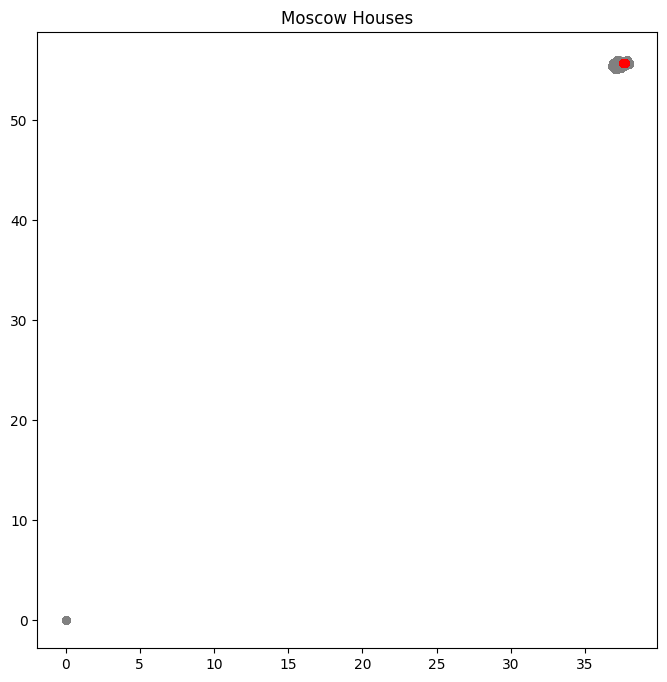

In [154]:
plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

Ooooops seems a bit wrong. 

**Question**: why does the plot look so strange? How to fix it?

**Your answer:** we have a strange points with coordinates around (0, 0). To fix this, we must remove that points

Now fix the `house_points` array, remove a set of points in the bottom left corner:

In [155]:
house_points = house_points[np.where(house_points[:, 0] > 5)]

And scatter it again:

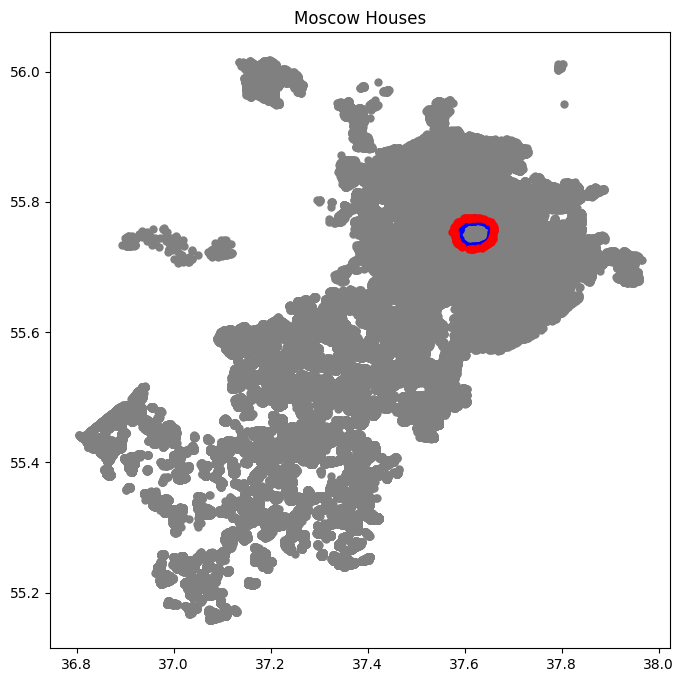

In [156]:
plt.figure(figsize=(8, 8))
plt.title("Moscow Houses")
plt.scatter(house_points[:, 0], house_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

Let's do a little zoom-in: filter `house_points` and leave points in some **small square** near the garden ring. The choice of the size of the square is up to you, but the outer poly should be inside this square.

I have already defined a small square, but you can change its sizes.

In [157]:
from tkinter.messagebox import RETRY


lower_x = 37.56
upper_x = 37.68
lower_y = 55.70
upper_y = 55.80

def filter_points_by_square(input_array, lower_x, upper_x, lower_y, upper_y):
    output_array = input_array[np.where(input_array[:, 0] >= lower_x)]
    output_array = output_array[np.where(output_array[:, 0] <= upper_x)]
    output_array = output_array[np.where(output_array[:, 1] >= lower_y)]
    output_array = output_array[np.where(output_array[:, 1] <= upper_y)]
    return output_array

In [158]:
small_square_points = filter_points_by_square(house_points, lower_x, upper_x, lower_y, upper_y)

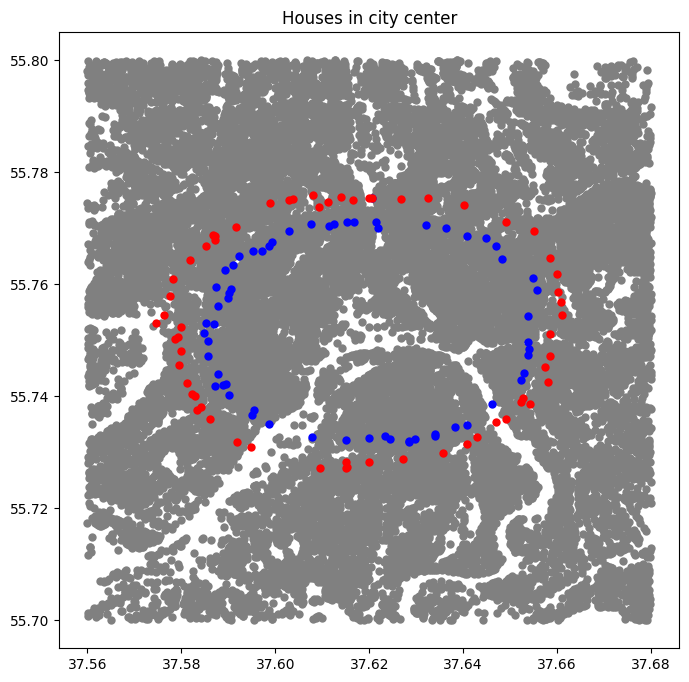

In [159]:
plt.figure(figsize=(8, 8))
plt.title("Houses in city center")
plt.scatter(small_square_points[:, 0], small_square_points[:, 1], linewidths=0.001, c="grey")
plt.scatter(inner_poly[:, 0], inner_poly[:, 1], linewidths=0.005, c="b")
plt.scatter(outer_poly[:, 0], outer_poly[:, 1], linewidths=0.005, c="r")
plt.show()

**Task 4. Houses in a polygon [2 points]**

Implement a function, that by two coordinates of a point and list of coordinates of the polygon tells whether this point is inside a polygon or not.

You may define as many others functions as you want.

*Hint: the polygons may be regarded as convex.*

**Question:** what algorithm to decide whether the point is inside will you implement? Why is it supposed to work?

**Your answer:** 
1) Build convex hulls for inner_poly and outer_poly. There are two convex polygons;
2) The point P is inside the convex polygon with vertices {V}, if, when traversed, it remains on one side of each edge (V_(i), V_(i+1));
3) This means that the cross product between all pairs of vectors: (V_(i), V_(i+1)), (V_(i), P), must have the same sign. 

In [160]:
def cross_product(v_1, v_2):
    return v_1[0] * v_2[1] - v_1[1] * v_2[0]

In [161]:
def point_is_inside(point, polygon_points):
    """
    input:
    - point np.array of (1, 2) shape
    - polygon_points np.array of (N, 2) shape
    output:
    - bool True if point is inside, false if point is outside
    """
    current_cp = cross_product([polygon_points[1][0] - polygon_points[0][0], polygon_points[1][1] - polygon_points[0][1]] , [point[0] - polygon_points[0][0], point[1] - polygon_points[0][1]])
    previous_cp = current_cp
    for i in range(len(polygon_points) - 1):
        v_1 = [polygon_points[i + 1][0] - polygon_points[i][0], polygon_points[i + 1][1] - polygon_points[i][1]]
        v_2 = [point[0] - polygon_points[i][0], point[1] - polygon_points[i][1]]
        current_cp = cross_product(v_1, v_2)
        if current_cp * previous_cp < 0:
            return False
        previous_cp = current_cp    
    
    return True


And the final part! 

Scatter plot `small_square_points` again, but with 3 different colours:
- colour 1: points inside inner poly
- colour 2: points outside outer poly
- colour 3: points between inner and outer polys

In [162]:
from scipy.spatial import ConvexHull
inner_poly_convex = ConvexHull(inner_poly)
inner_poly_convex = inner_poly_convex.points[inner_poly_convex.vertices]
outer_poly_convex = ConvexHull(outer_poly)
outer_poly_convex = outer_poly_convex.points[outer_poly_convex.vertices]

In [163]:
points_inside = []
points_outside = []
points_between = []
for point in small_square_points:
    if point_is_inside(point, inner_poly_convex):
        points_inside.append(point)
    elif  not point_is_inside(point, outer_poly_convex):
        points_outside.append(point)
    else:
        points_between.append(point)
points_inside = np.array(points_inside)
points_outside = np.array(points_outside)
points_between = np.array(points_between)                   

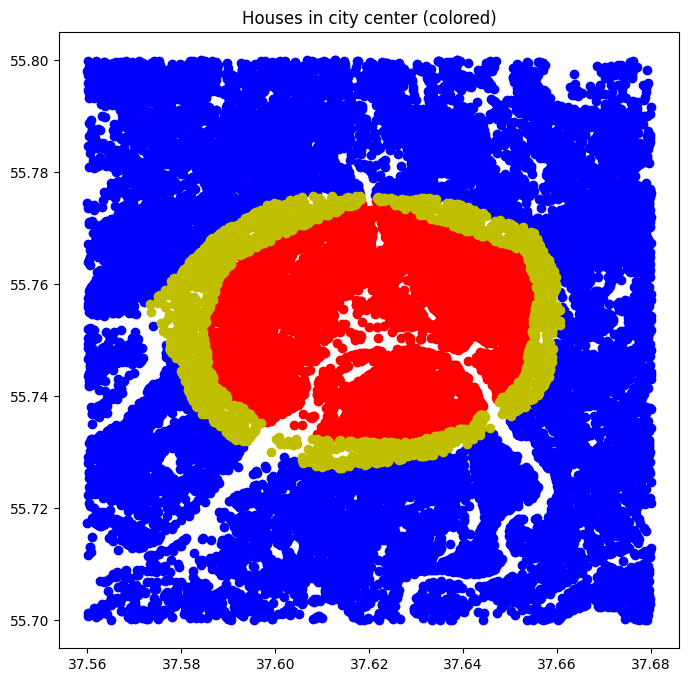

In [164]:
plt.figure(figsize=(8, 8))
plt.title("Houses in city center (colored)")
plt.scatter(points_inside[:,0], points_inside[:, 1], c='r')
plt.scatter(points_outside[:,0], points_outside[:, 1], c='b')
plt.scatter(points_between[:,0], points_between[:, 1], c='y')
plt.show()

In [165]:
print(len(points_between))

2442


**Question:** How many points are there between inner and outer polys?

**Your answer:** about 2442

# Part 3. Titanic Dataset - Stats and Plots [8 points]


In this part we are going to analyze the "Titanic dataset".
The main goal of this task is to describe the data.

Here are some tips:
- use plots
- notice pecualrities in the data
- present verbal explanations, don't be too shy

**Important** Please pay attention to your plots: titles, axis-labels and legends are necessary.

These  tasks involve `numpy`, `pandas` and `matplotlib` - very common python modules. In one task you may use `scipy`.

#### Input data
This task uses 2 files:
- `passengers_record.csv` contains some general information on passengers (name, class, age, etc.)
- `survival_info.csv` contains binary labels whether passenger survived or not

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [254]:
import seaborn as sb

**Task 1. [1 point]**

Read these files and join them into single dataset (use `passenger_id` as join key). Then provide some description of the dataset: 
- What are age/gender/class distributions and their averages? How many people belong to each group?
- Find the oldest/youngest passangers in every class
- Compare survival rates between classes/age groups/genders (configuration of age groups is up to you)

In [255]:
passengers_record = pd.read_csv("data/passengers_record.csv")
survival_info = pd.read_csv("data/survival_info.csv")

assert passengers_record.shape == (891, 11) and survival_info.shape == (891, 2), "Wrong db shapes"

In [256]:
db = pd.merge(passengers_record, survival_info)
db.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [257]:
age_groups = [len(db[db["Age"] <= 10]), len(db[db["Age"].between(10, 20)]), len(db[db["Age"].between(20, 30)]), len(db[db["Age"].between(30, 40)]), len(db[db["Age"].between(40, 50)]), len(db[db["Age"].between(50, 60)]), len(db[db["Age"].between(60, 70)]), len(db[db["Age"].between(70, 80)]), len(db[db["Age"] > 80])]
age_groups_str = ["1", "2", "3", "4", "5", "6", "7", "8"]
age_groups_dict = dict(zip(age_groups_str, age_groups))

print(len(db[db["Pclass"] == 1]), len(db[db["Pclass"] == 2]), len(db[db["Pclass"] == 3]))
print(len(db[db["Sex"] == "male"]), len(db[db["Sex"] == "female"]))
print(len(db[db["Age"] <= 10]), len(db[db["Age"].between(10, 20)]), len(db[db["Age"].between(20, 30)]), len(db[db["Age"].between(30, 40)]), len(db[db["Age"].between(40, 50)]), len(db[db["Age"].between(50, 60)]), len(db[db["Age"].between(60, 70)]), len(db[db["Age"].between(70, 80)]), len(db[db["Age"] > 80]))

sex = []
for i in range(len(db["Sex"])):
    if db["Sex"][i] == "male":
        sex.append(0)
    else:
        sex.append(1)
print(np.array(sex).mean(), db.mean(), sep='\n')

216 184 491
577 314
64 117 245 180 99 52 21 7 0
0.35241301907968575
PassengerId    446.000000
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
Survived         0.383838
dtype: float64


C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\1516006427.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(np.array(sex).mean(), db.mean(), sep='\n')


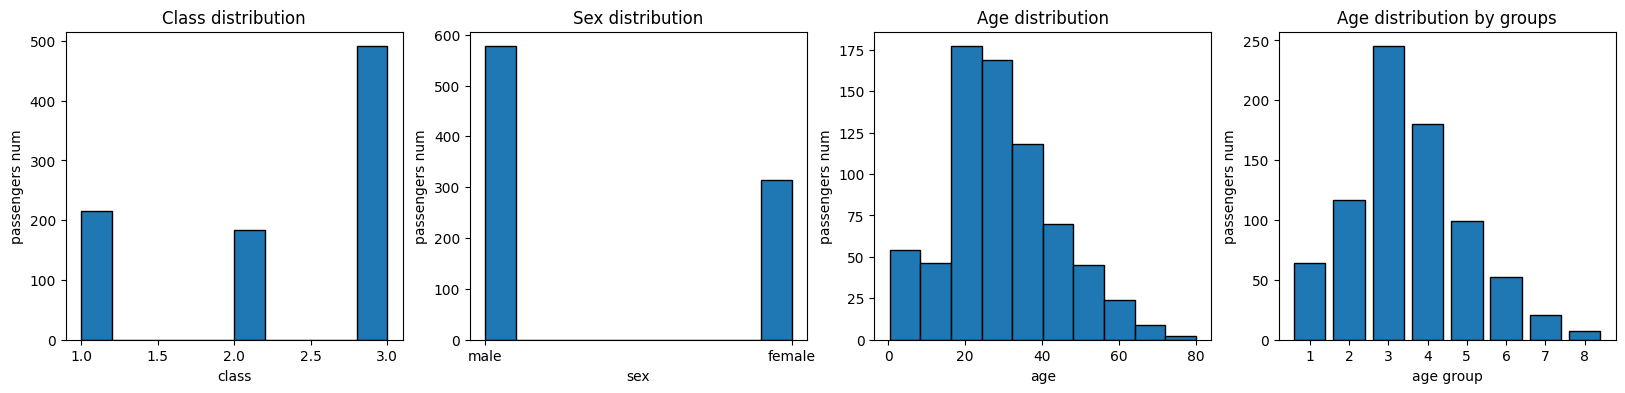

In [258]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))

ax[0].hist(db["Pclass"], edgecolor = 'black')
ax[0].set_title('Class distribution')
ax[0].set_xlabel('class')
ax[0].set_ylabel('passengers num')

ax[1].hist(db["Sex"], edgecolor = 'black')
ax[1].set_title('Sex distribution')
ax[1].set_xlabel('sex')
ax[1].set_ylabel('passengers num')

ax[2].hist(db["Age"], edgecolor = 'black')
ax[2].set_title('Age distribution')
ax[2].set_xlabel('age')
ax[2].set_ylabel('passengers num')

ax[3].bar(age_groups_dict.keys(), age_groups_dict.values(), edgecolor = 'black')
ax[3].set_title('Age distribution by groups')
ax[3].set_xlabel('age group')
ax[3].set_ylabel('passengers num')

plt.show()

There are 216 first class passengers, 184 second class passengers and 491 third class passengers.  
There are 577 man and 314 woman.  
There are some age groups of passengers:
1) 0-10: 64 passangers
2) 10-20: 117 passengers
3) 20-30: 245 passengers
4) 30-40: 180 passengers
5) 40-50: 99 passengers
6) 50-60: 52 passengers
7) 60-70: 21 passengers
8) 70-80: 7 passengers  

**The average values ​​for:**   
- class distribution is second class  
- sex distribution is male  
- age distribution is 30 years 

In [259]:
print(db[db["Age"] == db[db["Pclass"] == 1]["Age"].min()]["Name"])
print(db[db["Age"] == db[db["Pclass"] == 2]["Age"].min()]["Name"])
print(db[db["Age"] == db[db["Pclass"] == 3]["Age"].min()]["Name"])


305    Allison, Master. Hudson Trevor
Name: Name, dtype: object
755    Hamalainen, Master. Viljo
Name: Name, dtype: object
803    Thomas, Master. Assad Alexander
Name: Name, dtype: object


In [260]:
print(db[db["Age"] == db[db["Pclass"] == 1]["Age"].max()]["Name"])
print(db[db["Age"] == db[db["Pclass"] == 2]["Age"].max()]["Name"])
print(db[db["Age"] == db[db["Pclass"] == 3]["Age"].max()]["Name"])

630    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object
672     Mitchell, Mr. Henry Michael
745    Crosby, Capt. Edward Gifford
Name: Name, dtype: object
851    Svensson, Mr. Johan
Name: Name, dtype: object


**The youngest passengers are:**  
- In first class there is Allison, Master. Hudson Trevor;  
- In second class there is Hamalainen, Master. Viljo;  
- In third class there is Thomas, Master. Assad Alexander.

**The oldest passengers are:**  
- In first class there is Barkworth, Mr. Algernon Henry Wilson;  
- In second class there are Mitchell, Mr. Henry Michael and Crosby, Capt. Edward Gifford;  
- In third class there is Svensson, Mr. Johan.

In [261]:
age_groups_limits = [[0, 10], [10, 20], [20, 30], [30, 40], [40, 50], [50, 60], [60, 70], [70, 80]]

In [262]:
classes_not_survived = []
for i in range(3):
    classes_not_survived.append(len(db[db["Survived"] == 0][db["Pclass"] == i+1]))

classes_survived = []
for i in range(3):
    classes_survived.append(len(db[db["Survived"] == 1][db["Pclass"] == i+1]))

gender_not_survived = []
gender_not_survived.append(len(db[db["Survived"] == 0][db["Sex"] == 'male']))
gender_not_survived.append(len(db[db["Survived"] == 0][db["Sex"] == 'female']))

gender_survived = []
gender_survived.append(len(db[db["Survived"] == 1][db["Sex"] == 'male']))
gender_survived.append(len(db[db["Survived"] == 1][db["Sex"] == 'female']))   

age_group_not_survived = []
for i in range(8):
    age_group_not_survived.append(len(db[db["Survived"] == 0][db["Age"].between(age_groups_limits[i][0], age_groups_limits[i][1])]))

age_group_survived = []
for i in range(8):
    age_group_survived.append(len(db[db["Survived"] == 1][db["Age"].between(age_groups_limits[i][0], age_groups_limits[i][1])]))

C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2730607276.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  classes_not_survived.append(len(db[db["Survived"] == 0][db["Pclass"] == i+1]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2730607276.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  classes_survived.append(len(db[db["Survived"] == 1][db["Pclass"] == i+1]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2730607276.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_not_survived.append(len(db[db["Survived"] == 0][db["Sex"] == 'male']))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2730607276.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_not_survived.append(len(db[db["Survived"] == 0][db["Sex"] == 'female']))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2730607276.py:14: UserWarning: Boolean Series key will b

In [263]:
classes_survival_rate = np.array(classes_survived) / (np.array(classes_survived) + np.array(classes_not_survived))
gender_survival_rate = np.array(gender_survived) / (np.array(gender_survived) + np.array(gender_not_survived))
age_group_survival_rate = np.array(age_group_survived) / (np.array(age_group_survived) + np.array(age_group_not_survived))
print(classes_survival_rate, gender_survival_rate, age_group_survival_rate, sep='\n')

[0.62962963 0.47282609 0.24236253]
[0.18890815 0.74203822]
[0.59375    0.37606838 0.35510204 0.43888889 0.39393939 0.42307692
 0.28571429 0.14285714]


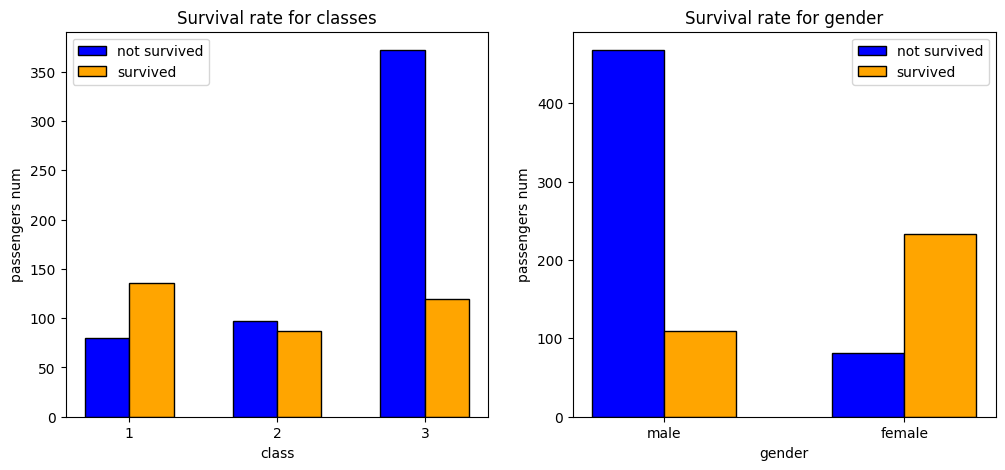

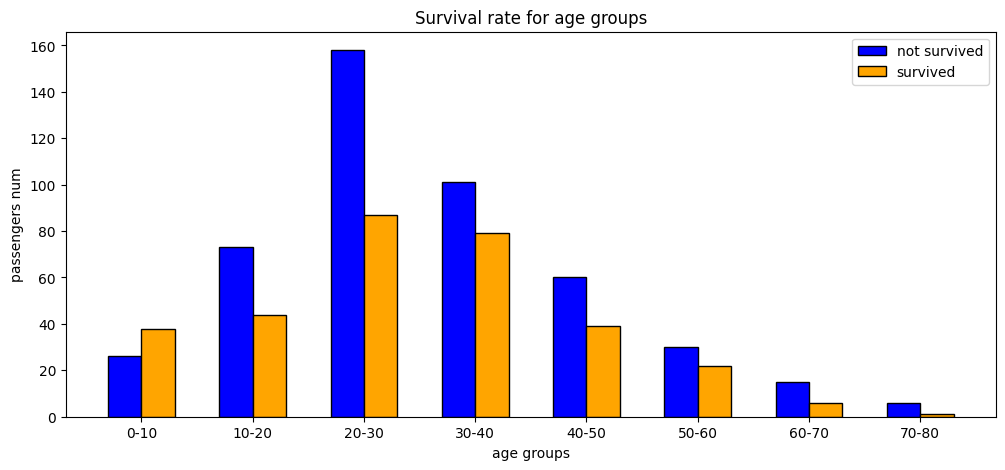

In [264]:
barWidth = 0.3

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(np.arange(1, 4)-barWidth/2, classes_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[0].bar(np.arange(1, 4)+barWidth/2, classes_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[0])
plt.xticks(range(1, 4), ['1', '2', '3'])
ax[0].set_title('Survival rate for classes')
ax[0].set_xlabel('class')
ax[0].set_ylabel('passengers num')
ax[0].legend()

ax[1].bar(np.arange(1, 3)-barWidth/2, gender_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[1].bar(np.arange(1, 3)+barWidth/2, gender_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[1])
plt.xticks(range(1, 3), ['male', 'female'])
ax[1].set_title('Survival rate for gender')
ax[1].set_xlabel('gender')
ax[1].set_ylabel('passengers num')
ax[1].legend()

plt.figure(figsize=(12, 5))
plt.bar(np.arange(1, 9)-barWidth/2, age_group_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
plt.bar(np.arange(1, 9)+barWidth/2, age_group_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.xticks(range(1, 9), ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
plt.title('Survival rate for age groups')
plt.xlabel('age groups')
plt.ylabel('passengers num')
plt.legend()

**Survival rates for:**  
- Classe: 
  - first -- **0.63**;
  - second -- **0.47**;
  - third -- **0.24**.
- Gender: 
  - male -- **0.19**;
  - female -- **0.74**.
- Age groups:  
  - 0-10 -- **0.6**;
  - 10-20 -- **0.37**; 
  - 20-30 -- **0.35**; 
  - 30-40 -- **0.44**; 
  - 40-50 -- **0.4**;
  - 50-60 -- **0.42**;
  - 60-70 -- **0.28**; 
  - 70-80 -- **0.14**.

**Task 2. [2 points]**

Compare average age per class: can we consider these values to be equal? Use visualisation to prove your point. 

Can we answer this question using the T-test? Why? Here you may use `scipy.stats`.

In [265]:
average_age_class = []
average_age_class.append(db[db["Pclass"] == 1]["Age"].mean())
average_age_class.append(db[db["Pclass"] == 2]["Age"].mean())
average_age_class.append(db[db["Pclass"] == 3]["Age"].mean())
print(average_age_class)

[38.233440860215055, 29.87763005780347, 25.14061971830986]


Text(0, 0.5, 'average age')

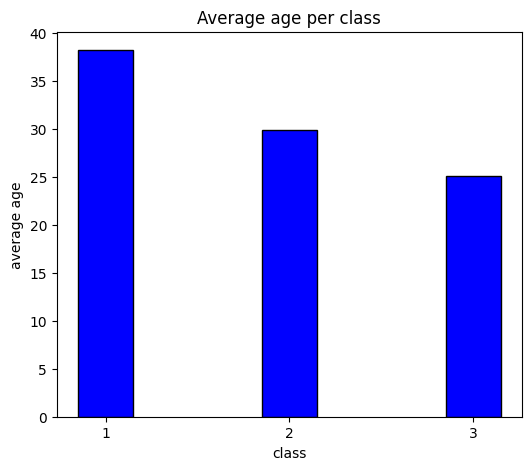

In [266]:
plt.figure(figsize=(6, 5))
plt.bar(np.arange(1, 4), average_age_class, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7)
plt.xticks(range(1, 4), ['1', '2', '3'])
plt.title('Average age per class')
plt.xlabel('сlass')
plt.ylabel('average age')

As we can see from the barplot, the average age per class is markedly different.  
There are  
- **38 years** for first class;  
- **30 years** for second class;  
- **25 years** for third class.  

So, for any pair of classes, we can assume that the average age belongs to different age groups. Therefore, they should not be considered  as equal.

Now, let's see to the **T-test** results. It is used to test the hypothesis of equal means. However, the data should have normal distribution. We can use **Shapiro-Wilk** test to check it. 

In [267]:
from cmath import nan
from scipy import stats

In [268]:
age_first_class = [x for x in db[db["Pclass"] == 1]["Age"] if str(x) != 'nan']
age_second_class = [x for x in db[db["Pclass"] == 2]["Age"] if str(x) != 'nan']
age_third_class = [x for x in db[db["Pclass"] == 3]["Age"] if str(x) != 'nan']

print(stats.shapiro(age_first_class), stats.shapiro(age_second_class), stats.shapiro(age_third_class), sep='\n')

ShapiroResult(statistic=0.9916939735412598, pvalue=0.3643055558204651)
ShapiroResult(statistic=0.9769523739814758, pvalue=0.005649181082844734)
ShapiroResult(statistic=0.9734370708465576, pvalue=4.1846224121400155e-06)


As we can see, only the age of **first class** passengers has a normal distribution (pvalue > 0.05). Still, let's use T-test.

In [269]:
print(stats.ttest_ind(age_first_class, age_second_class, equal_var=False), stats.ttest_ind(age_first_class, age_third_class, equal_var=False), stats.ttest_ind(age_second_class, age_third_class, equal_var=False), sep='\n')

Ttest_indResult(statistic=5.496279134324044, pvalue=7.396039343471019e-08)
Ttest_indResult(statistic=10.29334721459305, pvalue=1.0732266585658955e-21)
Ttest_indResult(statistic=3.777012120521916, pvalue=0.00019038678961437512)


For all pairs of classes, we found that the average age cannot be considered as equal(pvalue < 0.05). This is similar to barplot results.

**Task 3. [2 points]**

Use `plt.subplots` to create side-by-side histograms of distributions:
- columns: 3 classes
- rows: age, fare, sex, survival rate

The output is 4 by 3 table of plots.

In [270]:
db.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [271]:
classes_str = ["first", "second", "third"]
age_per_classes = [age_first_class, age_second_class, age_third_class]
fare_per_classes = [db[db["Pclass"] == 1]["Fare"], db[db["Pclass"] == 2]["Fare"], db[db["Pclass"] == 3]["Fare"]]
gender_per_classes = [db[db["Pclass"] == 1]["Sex"], db[db["Pclass"] == 2]["Sex"], db[db["Pclass"] == 3]["Sex"]]
survival_rate_per_classes = [np.array(db[db["Pclass"] == 1]["Survived"]), db[db["Pclass"] == 2]["Survived"], db[db["Pclass"] == 3]["Survived"]]

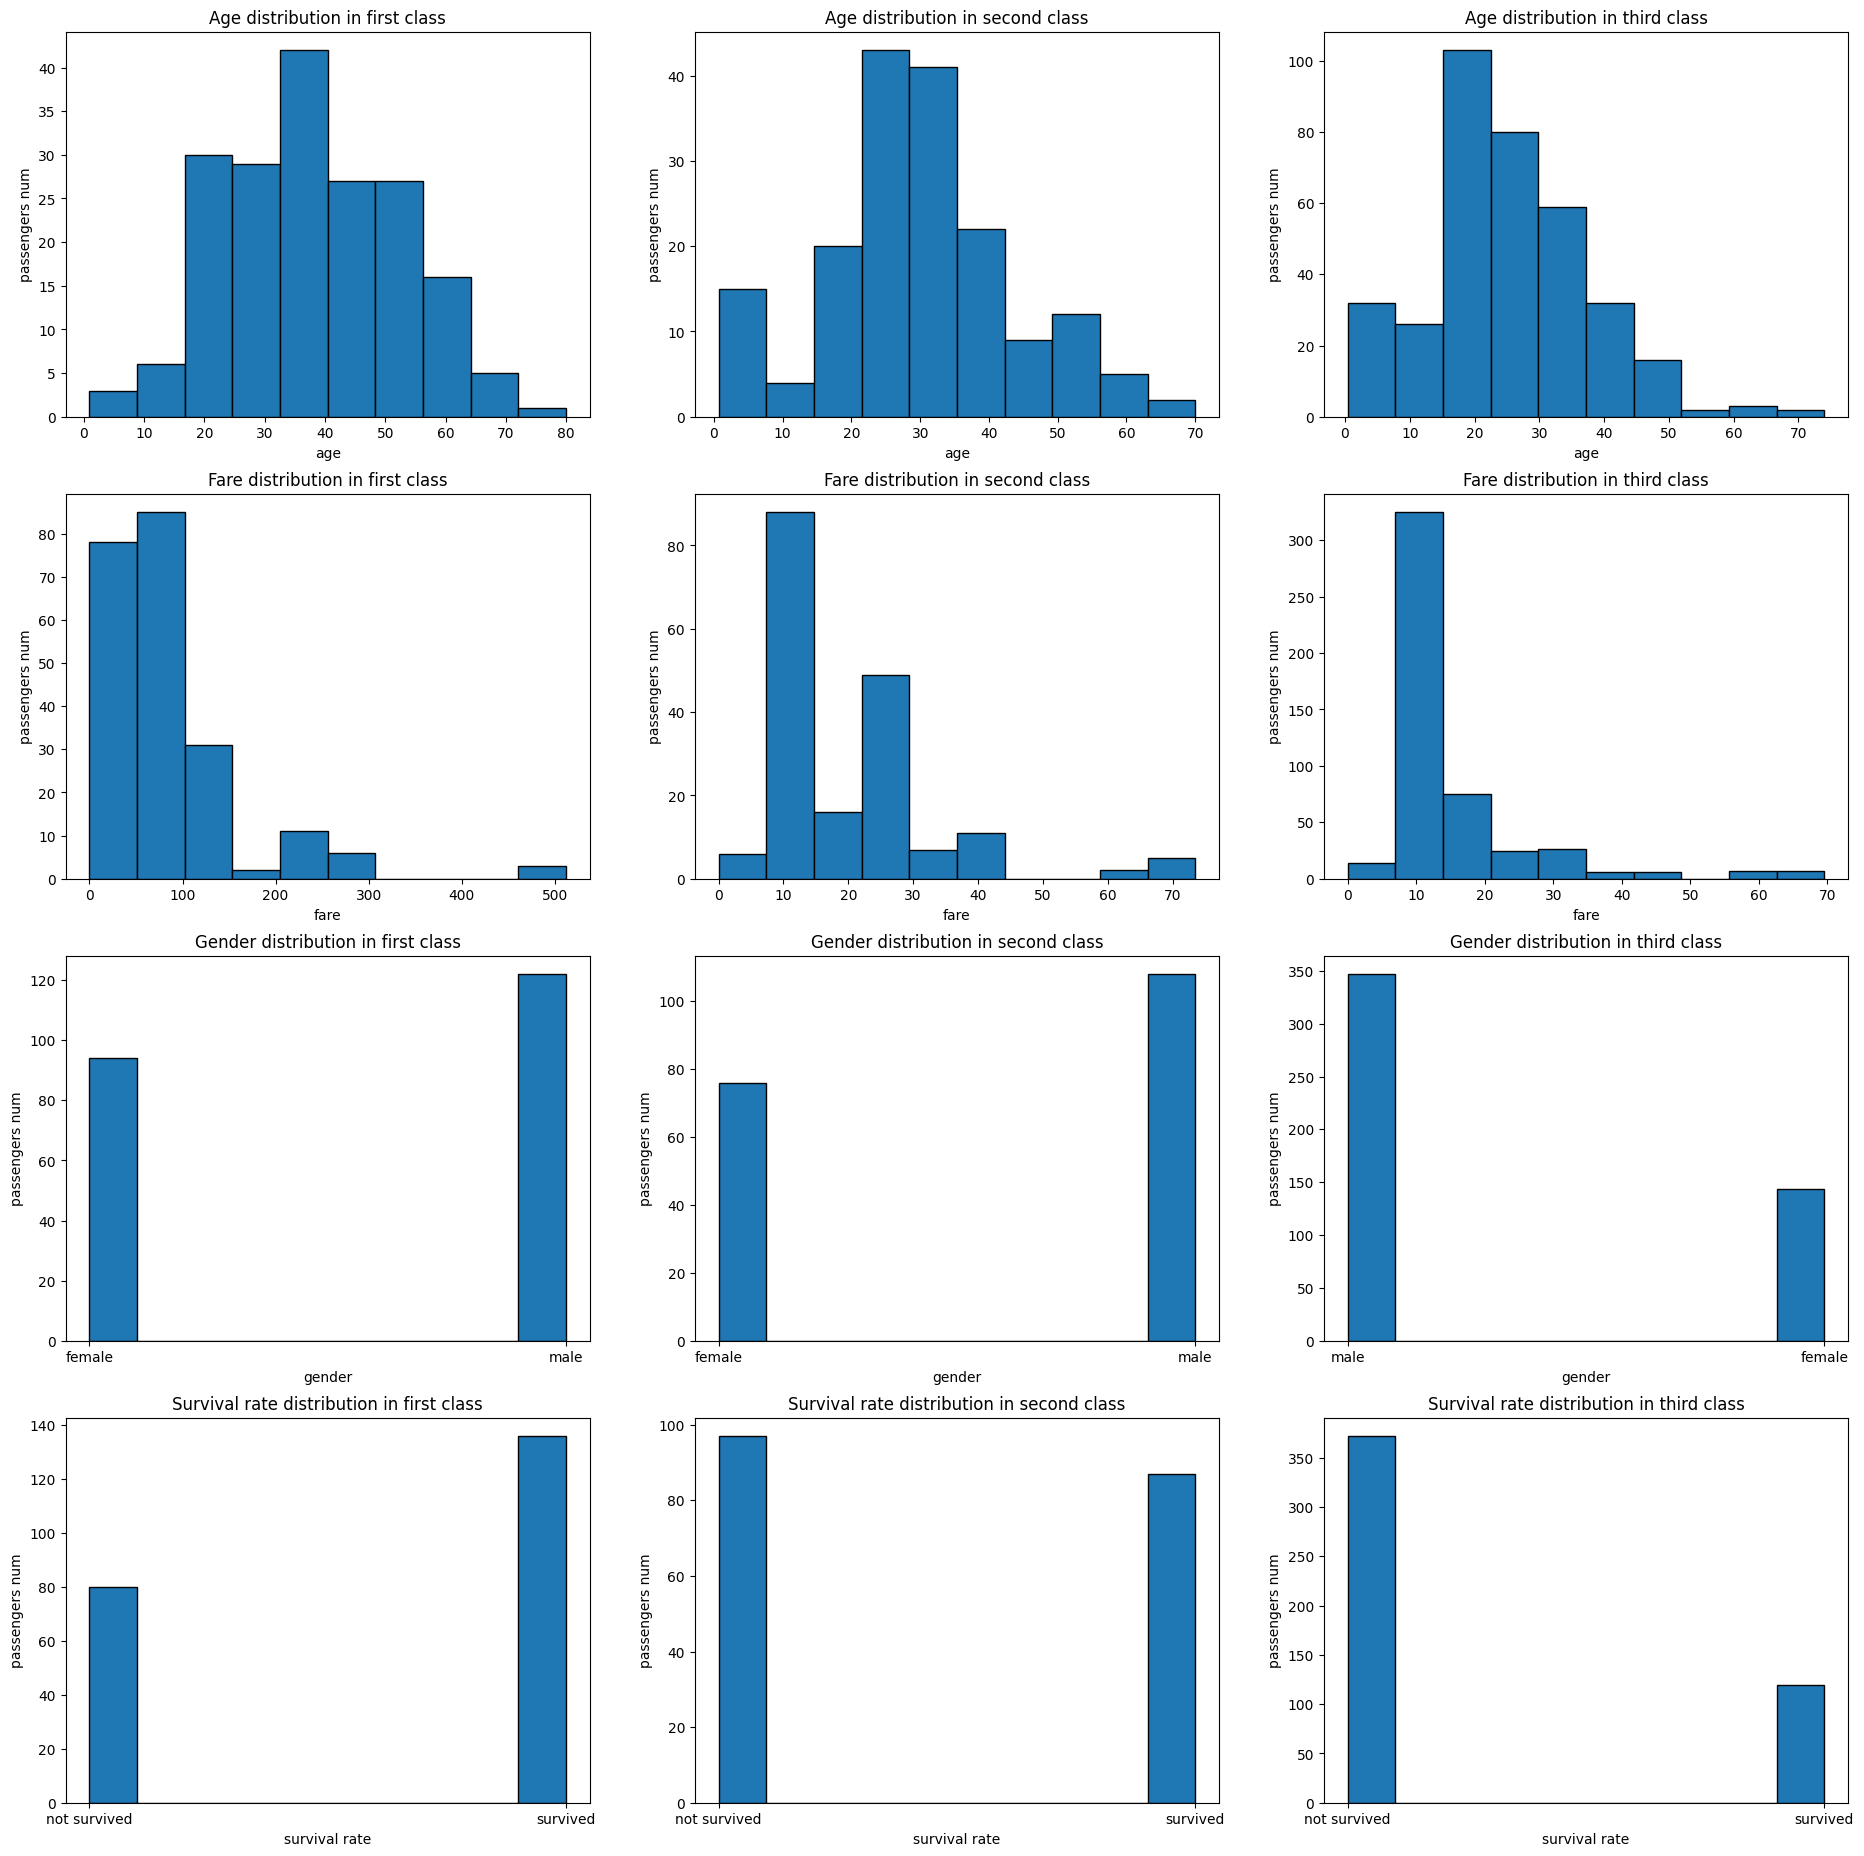

In [272]:
from turtle import width


barWidth = 0.5

fig, ax = plt.subplots(4, 3, figsize=(23, 23))

for i in range(3):
    ax[0][i].hist(age_per_classes[i], edgecolor = 'black')
    ax[0][i].set_title("Age distribution in " + classes_str[i] + " class")
    ax[0][i].set_xlabel("age")
    ax[0][i].set_ylabel("passengers num")

for i in range(3):
    ax[1][i].hist(fare_per_classes[i], edgecolor = 'black')
    ax[1][i].set_title("Fare distribution in " + classes_str[i] + " class")
    ax[1][i].set_xlabel("fare")
    ax[1][i].set_ylabel("passengers num")

for i in range(3):
    ax[2][i].hist(gender_per_classes[i], width=0.1, edgecolor = 'black')
    ax[2][i].set_title("Gender distribution in " + classes_str[i] + " class")
    ax[2][i].set_xlabel("gender")
    ax[2][i].set_ylabel("passengers num")

for i in range(3):
    ax[3][i].hist(survival_rate_per_classes[i], width=0.1, edgecolor = 'black')
    plt.sca(ax[3][i])
    plt.xticks(range(0, 2), ['not survived', 'survived'])
    ax[3][i].set_title("Survival rate distribution in " + classes_str[i] + " class")
    ax[3][i].set_xlabel("survival rate")
    ax[3][i].set_ylabel("passengers num")    

plt.show()

**Task 4. [1 point]**

Find 5 most common **surnames** in passenger list. Try to use `pandas.Series.apply` and lambda-function to extract surnames.

In [273]:
db.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [274]:
names = pd.Series(db["Name"]).apply(lambda x: (x.split())[0][0:-1])
print(names.value_counts()[0:8])

Andersson    9
Sage         7
Goodwin      6
Johnson      6
Skoog        6
Panula       6
Carter       6
Rice         5
Name: Name, dtype: int64


As we can see, there are a little more than 5 most common surnames:  
- In the first place is **Andersson;**
- In the second place is **Sage;**
- And the third-seventh places are shared between **Goodwin, Johnson, Skoog, Panula, Carter.**

**Task 5. [2 points]**

Probably you already have noticed that there are missing values in the dataset. We will try to fix that.
1. Omit all the rows, that contain missing values. Is the result plausible? How does this method effect amount of data and values from Task 1 (age histograms, survival rates, etc.?)
2. Suggest some better options to handle missing values in the data and check if it distorts the statistics.

**Firstly** let's look to full dataset

In [275]:
print(db.shape, db.head(), sep='\n')

(891, 12)
   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4     

There are **891** rows, it is seems a lot! Let's remove all rows with at least one **nan** ellement

In [276]:
bad_indexes = set()
db_array = np.array(db)
for i in range(len(db_array)):
    for j in range(len(db_array[0])):
        if str(db_array[i][j]) == 'nan':
            bad_indexes.add(i)

In [277]:
db_clear = db.drop(bad_indexes)
print(db_clear.shape, db_clear.head(), sep='\n')

(183, 12)
    PassengerId  Pclass                                               Name  \
1             2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3             4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
6             7       1                            McCarthy, Mr. Timothy J   
10           11       3                    Sandstrom, Miss. Marguerite Rut   
11           12       1                           Bonnell, Miss. Elizabeth   

       Sex   Age  SibSp  Parch    Ticket     Fare Cabin Embarked  Survived  
1   female  38.0      1      0  PC 17599  71.2833   C85        C         1  
3   female  35.0      1      0    113803  53.1000  C123        S         1  
6     male  54.0      0      0     17463  51.8625   E46        S         0  
10  female   4.0      1      1   PP 9549  16.7000    G6        S         1  
11  female  58.0      0      0    113783  26.5500  C103        S         1  


Now we have only **183** rows, it is five times less. Let's look to some date and dostribution from Task 1.

In [278]:
age_groups = [len(db_clear[db_clear["Age"] <= 10]), len(db_clear[db_clear["Age"].between(10, 20)]), len(db_clear[db_clear["Age"].between(20, 30)]), len(db_clear[db_clear["Age"].between(30, 40)]), len(db_clear[db_clear["Age"].between(40, 50)]), len(db_clear[db_clear["Age"].between(50, 60)]), len(db_clear[db_clear["Age"].between(60, 70)]), len(db_clear[db_clear["Age"].between(70, 80)]), len(db_clear[db_clear["Age"] > 80])]
age_groups_str = ["1", "2", "3", "4", "5", "6", "7", "8"]
age_groups_dict = dict(zip(age_groups_str, age_groups))

print(len(db_clear[db_clear["Pclass"] == 1]), len(db_clear[db_clear["Pclass"] == 2]), len(db_clear[db_clear["Pclass"] == 3]))
print(len(db_clear[db_clear["Sex"] == "male"]), len(db_clear[db["Sex"] == "female"]))
print(len(db_clear[db_clear["Age"] <= 10]), len(db_clear[db_clear["Age"].between(10, 20)]), len(db_clear[db_clear["Age"].between(20, 30)]), len(db_clear[db_clear["Age"].between(30, 40)]), len(db_clear[db_clear["Age"].between(40, 50)]), len(db_clear[db_clear["Age"].between(50, 60)]), len(db_clear[db_clear["Age"].between(60, 70)]), len(db_clear[db_clear["Age"].between(70, 80)]), len(db_clear[db_clear["Age"] > 80]))

sex_mean = len(db_clear[db_clear["Sex"] == "female"]) / len(db_clear["Sex"])
print(sex_mean, db_clear.mean(), sep='\n')

158 15 10
95 88
10 19 40 53 37 26 10 3 0
0.4808743169398907
PassengerId    455.366120
Pclass           1.191257
Age             35.674426
SibSp            0.464481
Parch            0.475410
Fare            78.682469
Survived         0.672131
dtype: float64


C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\719028544.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(db_clear[db_clear["Sex"] == "male"]), len(db_clear[db["Sex"] == "female"]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\719028544.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sex_mean, db_clear.mean(), sep='\n')


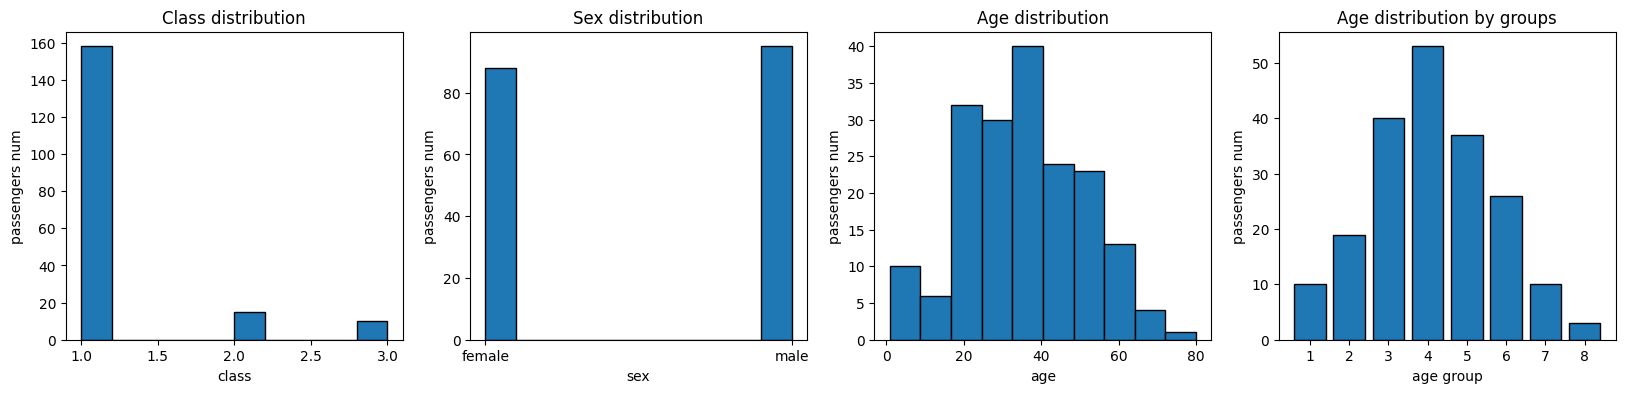

In [279]:

fig, ax = plt.subplots(1, 4, figsize=(20, 4))

ax[0].hist(db_clear["Pclass"], edgecolor = 'black')
ax[0].set_title('Class distribution')
ax[0].set_xlabel('class')
ax[0].set_ylabel('passengers num')

ax[1].hist(db_clear["Sex"], edgecolor = 'black')
ax[1].set_title('Sex distribution')
ax[1].set_xlabel('sex')
ax[1].set_ylabel('passengers num')

ax[2].hist(db_clear["Age"], edgecolor = 'black')
ax[2].set_title('Age distribution')
ax[2].set_xlabel('age')
ax[2].set_ylabel('passengers num')

ax[3].bar(age_groups_dict.keys(), age_groups_dict.values(), edgecolor = 'black')
ax[3].set_title('Age distribution by groups')
ax[3].set_xlabel('age group')
ax[3].set_ylabel('passengers num')

plt.show()

There are 158 first class passengers, 15 second class passengers and 10 third class passengers.  
There are 95 man and 88 woman.  
There are some age groups of passengers:
1) 0-10: 10 passangers
2) 10-20: 19 passengers
3) 20-30: 40 passengers
4) 30-40: 53 passengers
5) 40-50: 37 passengers
6) 50-60: 26 passengers
7) 60-70: 10 passengers
8) 70-80: 3 passengers  

**The average values ​​for:**   
- class distribution is the first class  
- sex distribution is about 50/50 for male and female  
- age distribution is 35 years 

Distribution for gender and for age, looks plausible. But distribution for class now useless, it's unreal that 90% of passengers are in first class

In [280]:
print(db_clear[db_clear["Age"] == db_clear[db_clear["Pclass"] == 1]["Age"].min()]["Name"])
print(db_clear[db_clear["Age"] == db_clear[db_clear["Pclass"] == 2]["Age"].min()]["Name"])
print(db_clear[db_clear["Age"] == db_clear[db_clear["Pclass"] == 3]["Age"].min()]["Name"])
print('\n')
print(db_clear[db_clear["Age"] == db_clear[db_clear["Pclass"] == 1]["Age"].max()]["Name"])
print(db_clear[db_clear["Age"] == db_clear[db_clear["Pclass"] == 2]["Age"].max()]["Name"])
print(db_clear[db_clear["Age"] == db_clear[db_clear["Pclass"] == 3]["Age"].max()]["Name"])


305    Allison, Master. Hudson Trevor
Name: Name, dtype: object
183    Becker, Master. Richard F
Name: Name, dtype: object
205        Strom, Miss. Telma Matilda
297      Allison, Miss. Helen Loraine
340    Navratil, Master. Edmond Roger
Name: Name, dtype: object


630    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object
772    Mack, Mrs. (Mary)
Name: Name, dtype: object
621                Kimball, Mr. Edwin Nelson Jr
699    Humblen, Mr. Adolf Mathias Nicolai Olsen
707           Calderhead, Mr. Edward Pennington
Name: Name, dtype: object


**The youngest passengers are:**  
- In first class there is Allison, Master. Hudson Trevor;  
- In second class there is Becker, Master. Richard F;  
- In third class there are 
  - Strom, Miss. Telma Matilda;
  - Allison, Miss. Helen Loraine;
  - Navratil, Master. Edmond Roger.

**The oldest passengers are:**  
- In first class there is Barkworth, Mr. Algernon Henry Wilson;  
- In second class there is Mack, Mrs. (Mary);  
- In third class there are 
  - Kimball, Mr. Edwin Nelson Jr;
  - Humblen, Mr. Adolf Mathias Nicolai Olsen
  - Calderhead, Mr. Edward Pennington


As we have more than 90% passengers in first class, only results for it have sense

In [281]:
age_groups_limits = [[0, 10], [10, 20], [20, 30], [30, 40], [40, 50], [50, 60], [60, 70], [70, 80]]
classes_not_survived = []
for i in range(3):
    classes_not_survived.append(len(db_clear[db_clear["Survived"] == 0][db_clear["Pclass"] == i+1]))

classes_survived = []
for i in range(3):
    classes_survived.append(len(db_clear[db_clear["Survived"] == 1][db_clear["Pclass"] == i+1]))

gender_not_survived = []
gender_not_survived.append(len(db_clear[db_clear["Survived"] == 0][db_clear["Sex"] == 'male']))
gender_not_survived.append(len(db_clear[db_clear["Survived"] == 0][db_clear["Sex"] == 'female']))

gender_survived = []
gender_survived.append(len(db_clear[db_clear["Survived"] == 1][db_clear["Sex"] == 'male']))
gender_survived.append(len(db_clear[db_clear["Survived"] == 1][db_clear["Sex"] == 'female']))   

age_group_not_survived = []
for i in range(8):
    age_group_not_survived.append(len(db_clear[db_clear["Survived"] == 0][db_clear["Age"].between(age_groups_limits[i][0], age_groups_limits[i][1])]))

age_group_survived = []
for i in range(8):
    age_group_survived.append(len(db_clear[db_clear["Survived"] == 1][db_clear["Age"].between(age_groups_limits[i][0], age_groups_limits[i][1])]))


C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2063811470.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  classes_not_survived.append(len(db_clear[db_clear["Survived"] == 0][db_clear["Pclass"] == i+1]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2063811470.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  classes_survived.append(len(db_clear[db_clear["Survived"] == 1][db_clear["Pclass"] == i+1]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2063811470.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_not_survived.append(len(db_clear[db_clear["Survived"] == 0][db_clear["Sex"] == 'male']))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2063811470.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_not_survived.append(len(db_clear[db_clear["Survived"] == 0][db_clear["Sex"] == 'female']))
C:\Users\timo2\AppData\Local\Temp\

In [282]:
classes_survival_rate = np.array(classes_survived) / (np.array(classes_survived) + np.array(classes_not_survived))
gender_survival_rate = np.array(gender_survived) / (np.array(gender_survived) + np.array(gender_not_survived))
age_group_survival_rate = np.array(age_group_survived) / (np.array(age_group_survived) + np.array(age_group_not_survived))
print(classes_survival_rate, gender_survival_rate, age_group_survival_rate, sep='\n')


[0.67088608 0.8        0.5       ]
[0.43157895 0.93181818]
[0.8        0.78947368 0.75       0.75471698 0.54054054 0.57692308
 0.3        0.33333333]


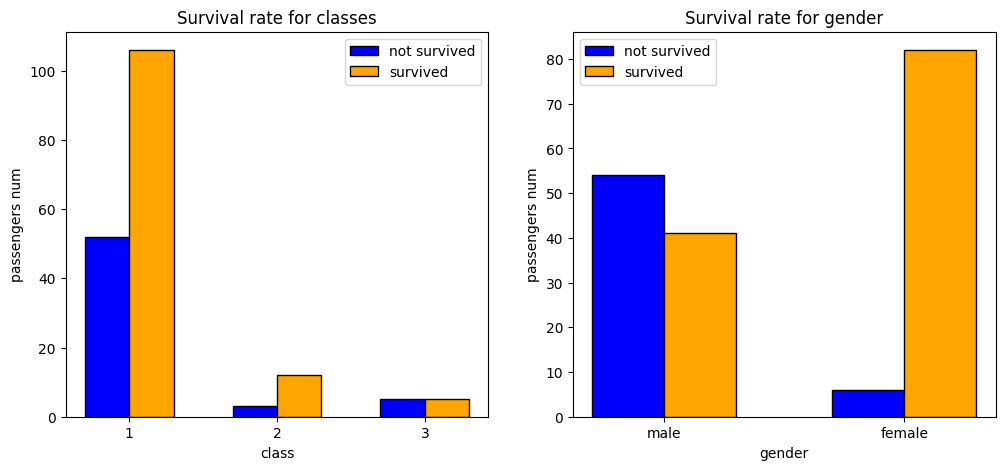

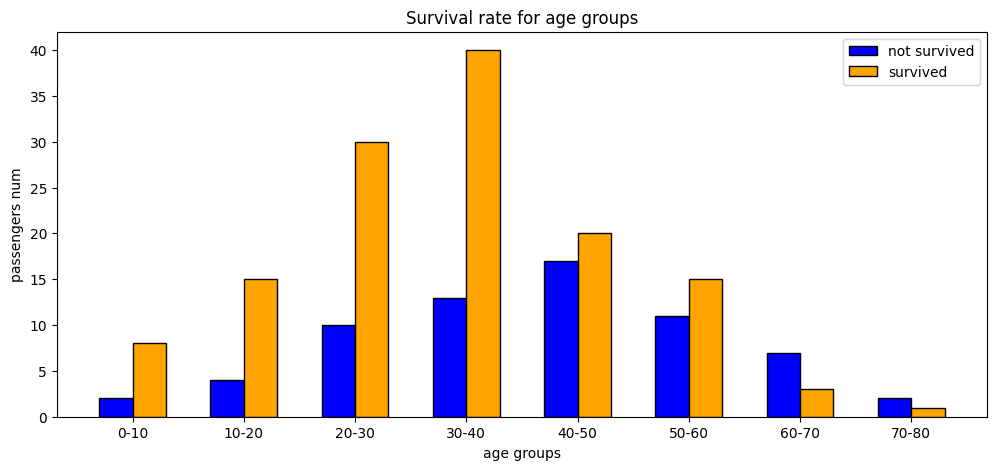

In [283]:
barWidth = 0.3

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(np.arange(1, 4)-barWidth/2, classes_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[0].bar(np.arange(1, 4)+barWidth/2, classes_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[0])
plt.xticks(range(1, 4), ['1', '2', '3'])
ax[0].set_title('Survival rate for classes')
ax[0].set_xlabel('class')
ax[0].set_ylabel('passengers num')
ax[0].legend()

ax[1].bar(np.arange(1, 3)-barWidth/2, gender_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[1].bar(np.arange(1, 3)+barWidth/2, gender_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[1])
plt.xticks(range(1, 3), ['male', 'female'])
ax[1].set_title('Survival rate for gender')
ax[1].set_xlabel('gender')
ax[1].set_ylabel('passengers num')
ax[1].legend()

plt.figure(figsize=(12, 5))
plt.bar(np.arange(1, 9)-barWidth/2, age_group_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
plt.bar(np.arange(1, 9)+barWidth/2, age_group_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.xticks(range(1, 9), ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
plt.title('Survival rate for age groups')
plt.xlabel('age groups')
plt.ylabel('passengers num')
plt.legend()

**Survival rates for:**  
- Classe: 
  - first -- **0.67**;
  - second -- **0.8**;
  - third -- **0.5**.
- Gender: 
  - male -- **0.43**;
  - female -- **0.93**.
- Age groups:  
  - 0-10 -- **0.8**;
  - 10-20 -- **0.79**; 
  - 20-30 -- **0.75**; 
  - 30-40 -- **0.75**; 
  - 40-50 -- **0.54**;
  - 50-60 -- **0.57**;
  - 60-70 -- **0.3**; 
  - 70-80 -- **0.33**.

Survival rate for the first class didn't change, for other classes it's useless. For male, female and **all** age groups we can see it becomes higher

Lets change all **nan** in Pclass, Sex, Age and Survived columns to their means, as we knaw from Task 1 for Sex it is *male*.

In [284]:
means = [int(db["PassengerId"].mean()), int(db["Pclass"].mean()), "Lost", "male", db["Age"].mean(), int(db["SibSp"].mean()), int(db["Parch"].mean()), "Ticket lost", db["Fare"].mean(), "Cabin lost", "Embarked lost", int(db["Survived"].mean())]
db_array = np.array(db)
for i in range(len(db_array)):
    for j in range(len(db_array[0])):
        if str(db_array[i][j]) == 'nan':
            db_array[i][j] = means[j]
new_db = pd.DataFrame(db_array)
new_db.columns = db.columns
print(new_db.head())            

  PassengerId Pclass                                               Name  \
0           1      3                            Braund, Mr. Owen Harris   
1           2      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           3      3                             Heikkinen, Miss. Laina   
3           4      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           5      3                           Allen, Mr. William Henry   

      Sex   Age SibSp Parch            Ticket     Fare       Cabin Embarked  \
0    male  22.0     1     0         A/5 21171     7.25  Cabin lost        S   
1  female  38.0     1     0          PC 17599  71.2833         C85        C   
2  female  26.0     0     0  STON/O2. 3101282    7.925  Cabin lost        S   
3  female  35.0     1     0            113803     53.1        C123        S   
4    male  35.0     0     0            373450     8.05  Cabin lost        S   

  Survived  
0        0  
1        1  
2        1  
3        1  
4        

In [285]:
age_groups = [len(new_db[new_db["Age"] <= 10]), len(new_db[new_db["Age"].between(10, 20)]), len(new_db[new_db["Age"].between(20, 30)]), len(new_db[new_db["Age"].between(30, 40)]), len(new_db[new_db["Age"].between(40, 50)]), len(new_db[new_db["Age"].between(50, 60)]), len(new_db[new_db["Age"].between(60, 70)]), len(new_db[new_db["Age"].between(70, 80)]), len(new_db[new_db["Age"] > 80])]
age_groups_str = ["1", "2", "3", "4", "5", "6", "7", "8"]
age_groups_dict = dict(zip(age_groups_str, age_groups))

print(len(new_db[new_db["Pclass"] == 1]), len(new_db[new_db["Pclass"] == 2]), len(new_db[new_db["Pclass"] == 3]))
print(len(new_db[new_db["Sex"] == "male"]), len(new_db[db["Sex"] == "female"]))
print(len(new_db[new_db["Age"] <= 10]), len(new_db[new_db["Age"].between(10, 20)]), len(new_db[new_db["Age"].between(20, 30)]), len(new_db[new_db["Age"].between(30, 40)]), len(new_db[new_db["Age"].between(40, 50)]), len(new_db[new_db["Age"].between(50, 60)]), len(new_db[new_db["Age"].between(60, 70)]), len(new_db[new_db["Age"].between(70, 80)]), len(new_db[new_db["Age"] > 80]))

sex_mean = len(new_db[new_db["Sex"] == "female"]) / len(new_db["Sex"])
print(sex_mean, new_db.mean(), sep='\n')

216 184 491
577 314
64 117 422 180 99 52 21 7 0
0.35241301907968575
PassengerId    446.000000
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
Survived         0.383838
dtype: float64


C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\3928606743.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(sex_mean, new_db.mean(), sep='\n')


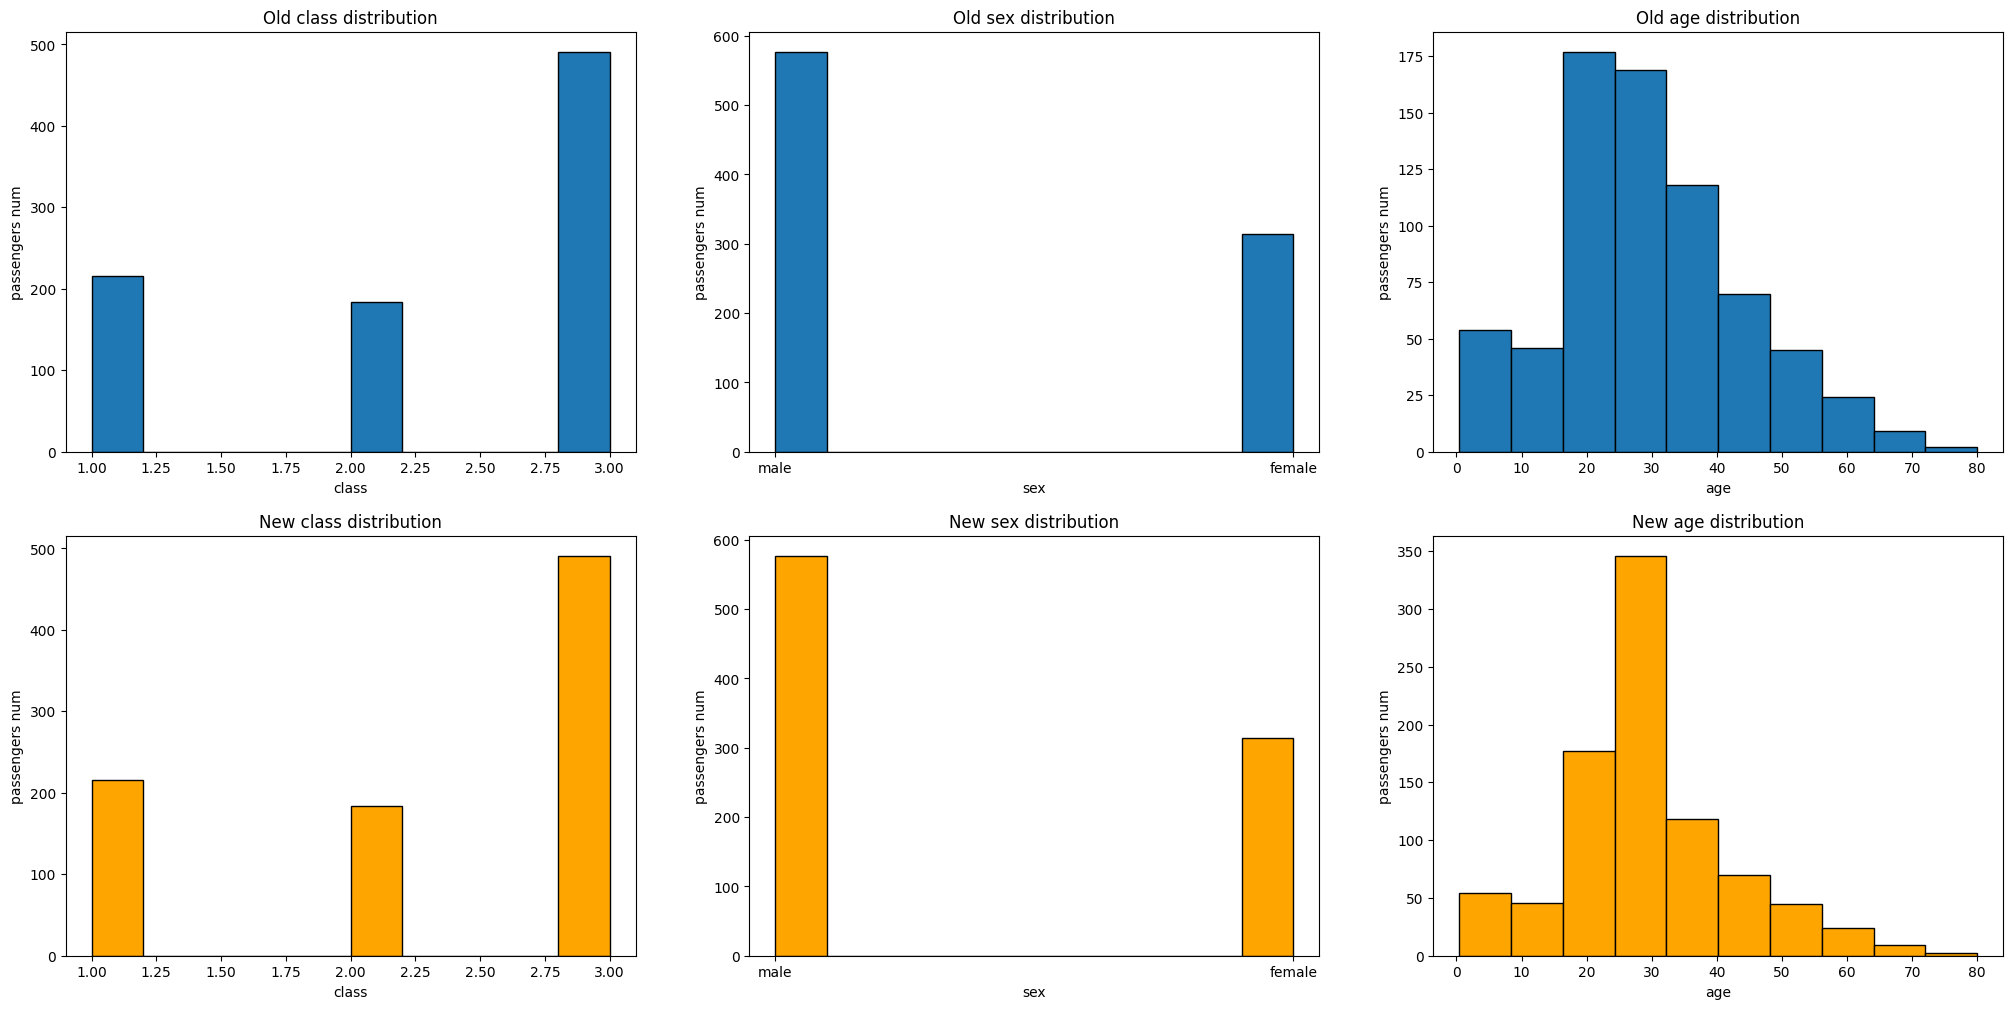

In [286]:

fig, ax = plt.subplots(2, 3, figsize=(25, 12))

ax[0][0].hist(db["Pclass"], edgecolor = 'black')
ax[0][0].set_title('Old class distribution')
ax[0][0].set_xlabel('class')
ax[0][0].set_ylabel('passengers num')

ax[0][1].hist(db["Sex"], edgecolor = 'black')
ax[0][1].set_title('Old sex distribution')
ax[0][1].set_xlabel('sex')
ax[0][1].set_ylabel('passengers num')

ax[0][2].hist(db["Age"], edgecolor = 'black')
ax[0][2].set_title('Old age distribution')
ax[0][2].set_xlabel('age')
ax[0][2].set_ylabel('passengers num')

ax[1][0].hist(new_db["Pclass"], edgecolor = 'black', color='orange')
ax[1][0].set_title('New class distribution')
ax[1][0].set_xlabel('class')
ax[1][0].set_ylabel('passengers num')

ax[1][1].hist(new_db["Sex"], edgecolor = 'black', color='orange')
ax[1][1].set_title('New sex distribution')
ax[1][1].set_xlabel('sex')
ax[1][1].set_ylabel('passengers num')

ax[1][2].hist(new_db["Age"], edgecolor = 'black', color='orange')
ax[1][2].set_title('New age distribution')
ax[1][2].set_xlabel('age')
ax[1][2].set_ylabel('passengers num')

plt.show()

As we can see, distibution for classes and genders looks similar in old and new datasets. This means there were few or no nan objects in these columns. For age distribution in old dataset we had average value about 30 years. And for new dataset we can see high peak in that value. That means that not few elements in age column are nan.

**Let's see to survival rate for new dataset**

In [290]:
age_groups_limits = [[0, 10], [10, 20], [20, 30], [30, 40], [40, 50], [50, 60], [60, 70], [70, 80]]
classes_not_survived = []
for i in range(3):
    classes_not_survived.append(len(new_db[new_db["Survived"] == 0][new_db["Pclass"] == i+1]))

classes_survived = []
for i in range(3):
    classes_survived.append(len(new_db[new_db["Survived"] == 1][new_db["Pclass"] == i+1]))

gender_not_survived = []
gender_not_survived.append(len(new_db[new_db["Survived"] == 0][new_db["Sex"] == 'male']))
gender_not_survived.append(len(new_db[new_db["Survived"] == 0][new_db["Sex"] == 'female']))

gender_survived = []
gender_survived.append(len(new_db[new_db["Survived"] == 1][new_db["Sex"] == 'male']))
gender_survived.append(len(new_db[new_db["Survived"] == 1][new_db["Sex"] == 'female']))   

age_group_not_survived = []
for i in range(8):
    age_group_not_survived.append(len(new_db[new_db["Survived"] == 0][new_db["Age"].between(age_groups_limits[i][0], age_groups_limits[i][1])]))

age_group_survived = []
for i in range(8):
    age_group_survived.append(len(new_db[new_db["Survived"] == 1][new_db["Age"].between(age_groups_limits[i][0], age_groups_limits[i][1])]))


C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2327589955.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  classes_not_survived.append(len(new_db[new_db["Survived"] == 0][new_db["Pclass"] == i+1]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2327589955.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  classes_survived.append(len(new_db[new_db["Survived"] == 1][new_db["Pclass"] == i+1]))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2327589955.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_not_survived.append(len(new_db[new_db["Survived"] == 0][new_db["Sex"] == 'male']))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\2327589955.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gender_not_survived.append(len(new_db[new_db["Survived"] == 0][new_db["Sex"] == 'female']))
C:\Users\timo2\AppData\Local\Temp\ipykernel_11624\23275899

In [291]:
classes_survival_rate = np.array(classes_survived) / (np.array(classes_survived) + np.array(classes_not_survived))
gender_survival_rate = np.array(gender_survived) / (np.array(gender_survived) + np.array(gender_not_survived))
age_group_survival_rate = np.array(age_group_survived) / (np.array(age_group_survived) + np.array(age_group_not_survived))
print(classes_survival_rate, gender_survival_rate, age_group_survival_rate, sep='\n')


[0.62962963 0.47282609 0.24236253]
[0.18890815 0.74203822]
[0.59375    0.37606838 0.32938389 0.43888889 0.39393939 0.42307692
 0.28571429 0.14285714]


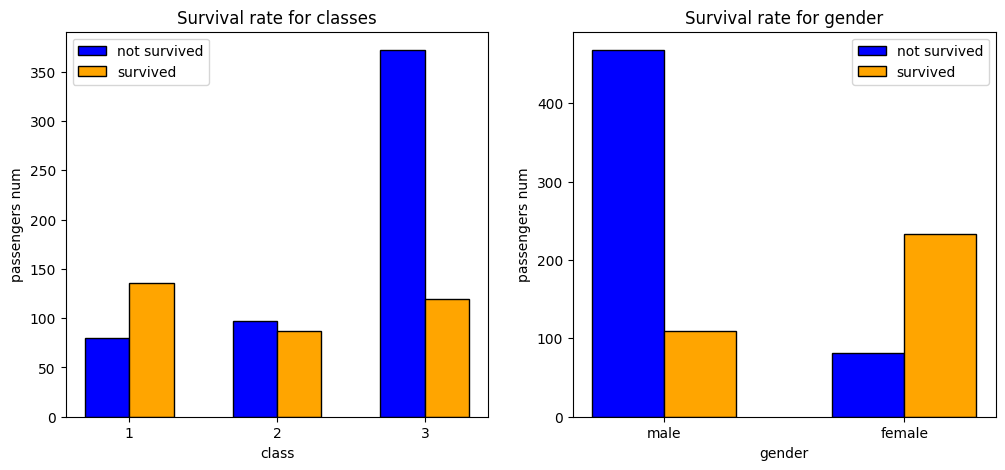

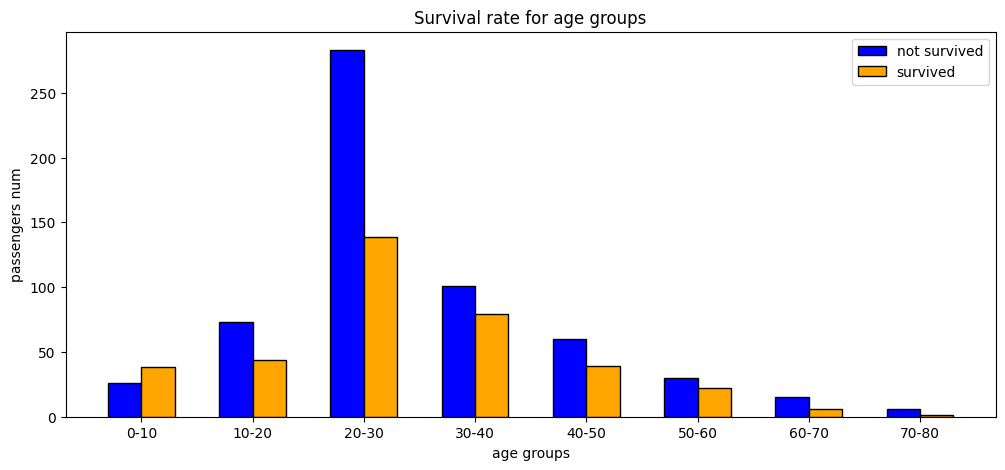

In [292]:
barWidth = 0.3

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(np.arange(1, 4)-barWidth/2, classes_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[0].bar(np.arange(1, 4)+barWidth/2, classes_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[0])
plt.xticks(range(1, 4), ['1', '2', '3'])
ax[0].set_title('Survival rate for classes')
ax[0].set_xlabel('class')
ax[0].set_ylabel('passengers num')
ax[0].legend()

ax[1].bar(np.arange(1, 3)-barWidth/2, gender_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
ax[1].bar(np.arange(1, 3)+barWidth/2, gender_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.sca(ax[1])
plt.xticks(range(1, 3), ['male', 'female'])
ax[1].set_title('Survival rate for gender')
ax[1].set_xlabel('gender')
ax[1].set_ylabel('passengers num')
ax[1].legend()

plt.figure(figsize=(12, 5))
plt.bar(np.arange(1, 9)-barWidth/2, age_group_not_survived, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='not survived')
plt.bar(np.arange(1, 9)+barWidth/2, age_group_survived, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='survived')
plt.xticks(range(1, 9), ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
plt.title('Survival rate for age groups')
plt.xlabel('age groups')
plt.ylabel('passengers num')
plt.legend()

Survival rate looks the same as for old dataset as for new dataset

### Great! Don't forget to submit before the deadline :)